In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score



In [ ]:
data = pd.read_csv("bottle.csv")  

fitur_independen = ['R_SIO3', 'R_PO4', 'R_NH4', 'DIC1', 'DIC2', 'TA1', 'TA2']
fitur_dependen = 'R_TEMP'

data_final = data[fitur_independen + [fitur_dependen]]


C:\Users\REVAN\AppData\Local\Temp\ipykernel_2452\1824331916.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("c:/Users/REVAN/Downloads/bottle.csv")


In [9]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   R_SIO3  354099 non-null  float64
 1   R_PO4   413325 non-null  float64
 2   R_NH4   64982 non-null   float64
 3   DIC1    1999 non-null    float64
 4   DIC2    224 non-null     float64
 5   TA1     2084 non-null    float64
 6   TA2     234 non-null     float64
 7   R_TEMP  853900 non-null  float64
dtypes: float64(8)
memory usage: 52.8 MB


In [10]:
data_final.isnull().sum()

R_SIO3    510764
R_PO4     451538
R_NH4     799881
DIC1      862864
DIC2      864639
TA1       862779
TA2       864629
R_TEMP     10963
dtype: int64

In [11]:
data_final.fillna(method='ffill', inplace=True)
data_final.dropna(inplace=True)

C:\Users\REVAN\AppData\Local\Temp\ipykernel_2452\4096569.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_final.fillna(method='ffill', inplace=True)
C:\Users\REVAN\AppData\Local\Temp\ipykernel_2452\4096569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final.fillna(method='ffill', inplace=True)
C:\Users\REVAN\AppData\Local\Temp\ipykernel_2452\4096569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final.dropna(inplace=True)


In [12]:
x = data_final.drop(columns=['R_TEMP'])  
y = data_final['R_TEMP']

x = x.iloc[:1500, :]
y = y.iloc[:1500]

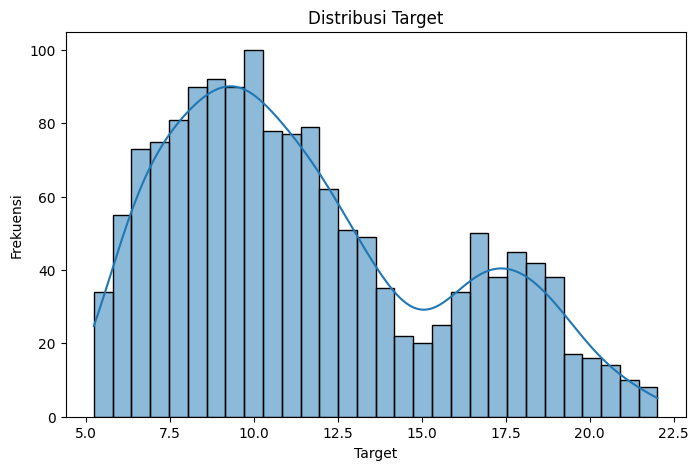

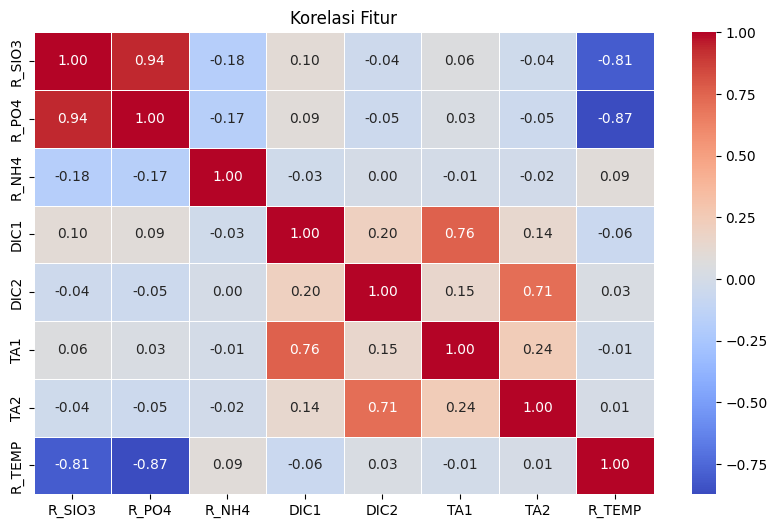

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(y, bins=30, kde=True)
plt.title("Distribusi Target")
plt.xlabel("Target")
plt.ylabel("Frekuensi")
plt.show()

# Heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(data_final.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasi Fitur")
plt.show()

In [56]:
skala = StandardScaler()
x_skala = skala.fit_transform(x)

latih_x, uji_x, latih_y, uji_y = train_test_split(data_final.iloc[:, :-1], data_final.iloc[:, -1], test_size=0.2, random_state=82)

kf = KFold(n_splits=30, shuffle=True, random_state=82)
k = 10

model = KNeighborsRegressor(n_neighbors=k, weights='distance')
scores = cross_val_score(model, data_final.iloc[:, :-1], data_final.iloc[:, -1], cv=kf, scoring='r2')
print(f"Mean Cross-Validation R² Score: {scores.mean():.4f}")

model_latih = KNeighborsRegressor(n_neighbors=k, weights='distance')
model_latih.fit(latih_x, latih_y)
score = model_latih.score(uji_x, uji_y)

Mean Cross-Validation R² Score: 0.9066


In [57]:
pred = model_latih.predict(uji_x)
print("Final Model Score: {:.4f}".format(score))

mse = mean_squared_error(uji_y, pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

mae = mean_absolute_error(uji_y, pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

r2 = r2_score(uji_y, pred)
print(f"R-squared Score (R²): {r2:.4f}")

mape = np.mean(np.abs((uji_y - pred) / uji_y)) * 100
print(f"R-squared Score (R²): {mape:.4f}")

Final Model Score: 0.9284
Mean Squared Error (MSE): 1.0185
Mean Absolute Error (MAE): 0.5327
Root Mean Squared Error (RMSE): 1.0092
R-squared Score (R²): 0.9284
R-squared Score (R²): 5.3171


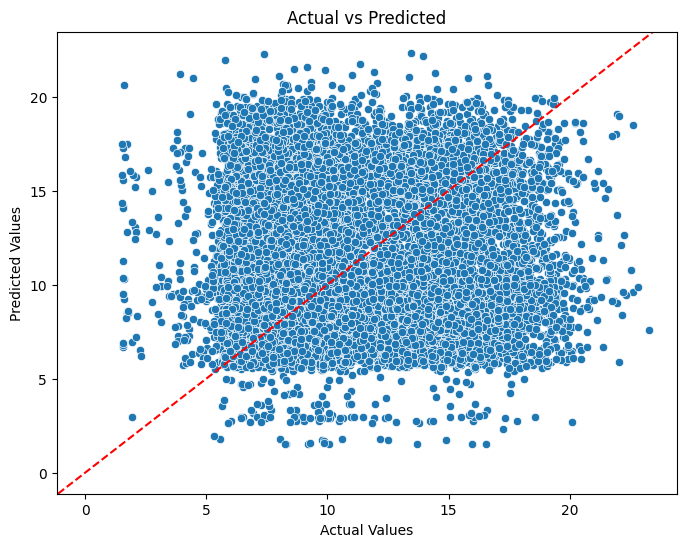

In [58]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=uji_y, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.axline([0, 0], [1, 1], color="red", linestyle="--")  
plt.show()

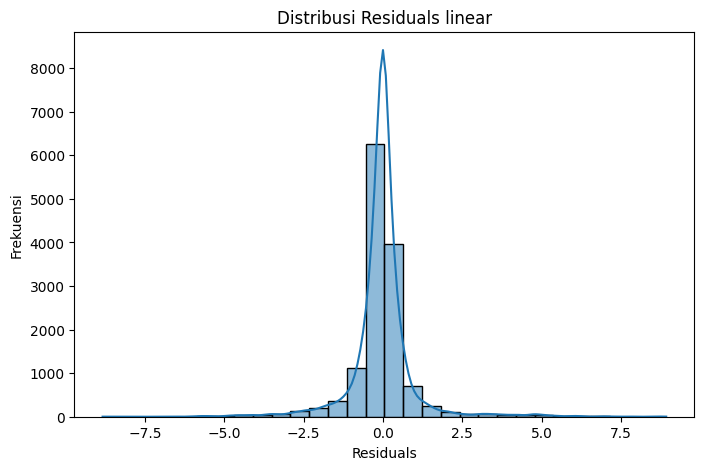

In [59]:
residuals = uji_y - pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frekuensi")
plt.title(f"Distribusi Residuals linear")
plt.show()